### Generación y adecuación de datos sintéticos
* Generación de datos
* Visualización
* Codificación de la salida en one-hot
* Separación de los conjuntos de training y test

Todo utilizando la librería ScikitLearn


In [10]:
import tensorflow as tf
from sklearn import datasets as skds


In [11]:
X, y = skds.make_classification(n_samples=400,
   n_features=2,
   n_informative=2, 
   n_redundant=0,  
   n_repeated=0, 
   n_classes=2,
   n_clusters_per_class=1)
print(y[1:6])

[1 1 1 1 0]


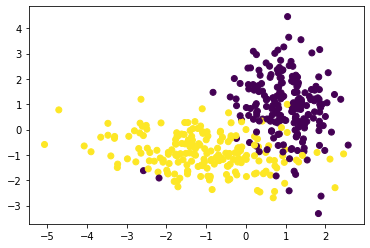

In [12]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],marker='o',c=y)
plt.show()

In [13]:
print(y[1:6])
import numpy as np
y=np.eye(2)[y]
print(y[1:6])

[1 1 1 1 0]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = (train_test_split(X, y,test_size=0.20, random_state=17))

print("X_train :", X_train[1:4])
print("y_train :", y_train[1:4])

print("X_test :",X_test[1:4])
print("y_test :",y_test[1:4])

X_train : [[ 0.26708613 -0.65695467]
 [-1.77307817 -0.5554028 ]
 [ 1.37716923  0.20779759]]
y_train : [[1. 0.]
 [0. 1.]
 [1. 0.]]
X_test : [[-0.14606973  1.8207068 ]
 [-0.48916706 -1.77433011]
 [ 1.6502608   1.58272428]]
y_test : [[1. 0.]
 [0. 1.]
 [1. 0.]]


### Definiendo variables y parámetros necesarios

Tenemos la función que necesitamos entrenar es: y = wx + b

Para ello vamos a definir todas las variables necesarias como las entradas


   

In [15]:
nIn = X_train.shape[1]
nOut = y_train.shape[1]
print(nIn)
print(nOut)

2
2


In [16]:
tasa_apren = 0.003
tasa_apren


0.003

In [19]:
mix = tf.placeholder(dtype=tf.float32, shape=[None, nIn])
miy = tf.placeholder(dtype=tf.float32, shape=[None, nOut])

w = tf.Variable(tf.zeros([nIn,nOut]), dtype=tf.float32)
b = tf.Variable(tf.zeros([nOut]), dtype=tf.float32)

b[1:3]

<tf.Tensor 'strided_slice_2:0' shape=(1,) dtype=float32>

###  Tema 4 Definimos el modelo y las funciones de pérdida y optimización
![alt text](modelo.png "modelo")  
 Debemos construir el modelo, para ello montaremos
 * Su definición
 * Funciones de pérdida 

Esto afecta a nuestra función de pérdida complicándola un poco más 
![alt text](imagename.png "formula")

 * Función de optimización


In [32]:
model = tf.nn.sigmoid(tf.matmul(mix,w)+b)

In [39]:
y_tra = tf.constant([6,2,4,2,2,5,5,2] , dtype=tf.float32)
y_ten = tf.constant([5,2,4,1,1,4,6,2], dtype=tf.float32)
sq = tf.square(y_tra - y_ten)
loss = tf.reduce_mean(sq)
sess = tf.Session()
sess.run(loss)



0.625

In [40]:
y_mean = tf.reduce_mean(y_ten)
total_error = tf.reduce_sum(tf.square(y_ten - y_mean))
unexplained_error = tf.reduce_sum(tf.square(y_ten - y_tra))
rs = 1 - tf.div(unexplained_error, total_error) 
sess = tf.Session() 
sess.run(rs)


0.79899496

In [41]:
loss = tf.reduce_mean(-tf.reduce_sum( (miy * tf.log(model)) + ((1 - miy) * tf.log(1 - model)), axis=1))


In [42]:
opt = tf.train.GradientDescentOptimizer(learning_rate=tasa_apren).minimize(loss)
